In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


from google.colab.patches import cv2_imshow

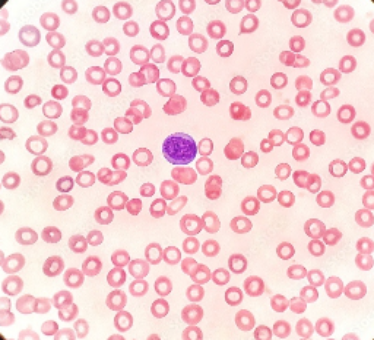

In [ ]:
#load image

image=cv2.imread("/content/blood_sample_4.JPG")
image=cv2.resize(image,(374,340))
crop=image[58:(57+222),58:(57+257)]
crop=cv2.resize(crop,(374,340))
crop_1=crop.copy()
cv2_imshow(crop)

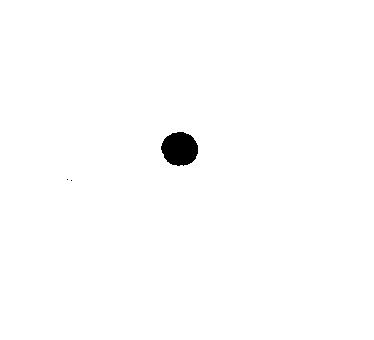

In [ ]:
lab=cv2.cvtColor(crop,cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)


ret,th=cv2.threshold(b,120,255,cv2.THRESH_BINARY)

cv2_imshow(th)

#120

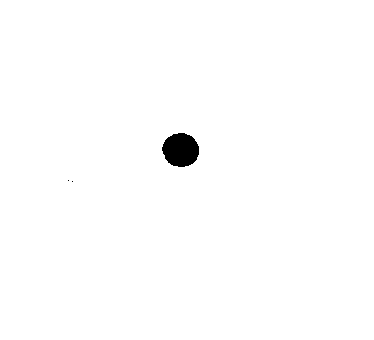

In [ ]:
k=np.ones((4,4),np.uint8)
opening=cv2.morphologyEx(th,cv2.MORPH_OPEN,k)
cv2_imshow(opening)



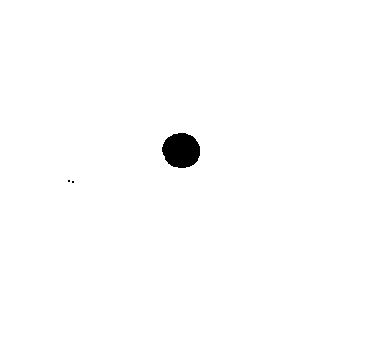

In [ ]:
k=np.ones((2,2),np.uint8)
erode=cv2.erode(opening,k)
cv2_imshow(erode)

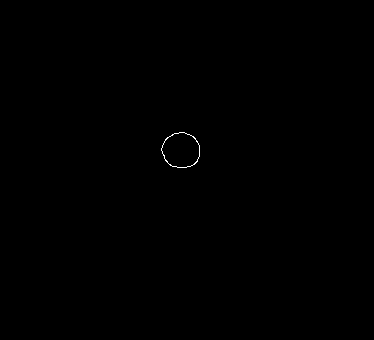

In [ ]:
edge=cv2.Canny(erode,100, 200)
cv2_imshow(edge)

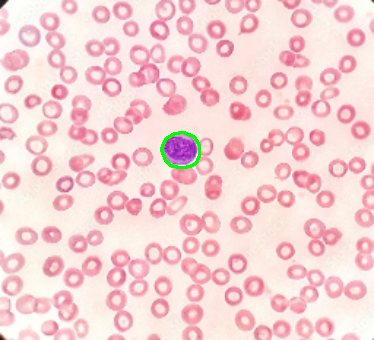

In [ ]:
contours,hierarchy= cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(crop,contours, -1, (0, 255, 0), 2)
cv2_imshow(crop)

In [ ]:
l=len(contours)

In [ ]:
plat=[]
for i in range(0,l):
  area=cv2.contourArea(contours[i])
  perimeter=cv2.arcLength(contours[i],True)
  if area<150 and perimeter<70:
    plat.append(contours[i])
  

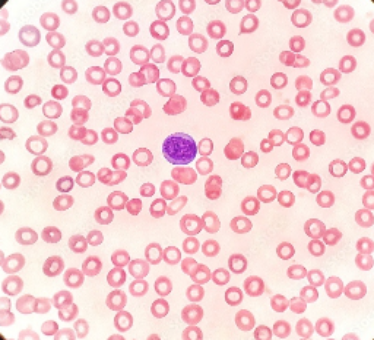

In [ ]:
cv2.drawContours(crop_1,plat,-1, (0, 255, 0), 2)
cv2_imshow(crop_1)

In [ ]:
plat_num =len(plat)
print("Number of detected platelets: ",plat_num)

Number of detected platelets:  0
